## Hello Everyone!
This is a Jupyter Notebook that I created for my CSC 301 Scientific Programming Class last semester. I hope you like it! 😇
Some things I added to it:
* More markdown features
* AI meme


#### The main purpose is to calculate  the definite integral of this function below,
${I} = \int_a^b {f(x)}\,dx$
#### where,
${f(x)} = \frac{100}{x^2}sin(\frac{10}{x})$
#### For an error bound of 10^-8 using both:
 * Composite Simpson's Rule
 * Adaptive Quadrature 
 
_Below you will find the application of each method, graph and results_

In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# Definite Integral
f = lambda x: 100/x**2*np.sin(10/x)
x= np.linspace(1,3,100)
y = f(x)

#### Function Graph
${f(x)} = \frac{100}{x^2}sin(\frac{10}{x})$

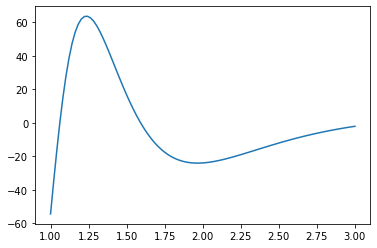

In [15]:
plt.plot(x,y)
plt.show()

### Method 1: Composite Simpson's Rule
Simpson's Rule is the technique to calculate the approximate value
of definite integrals (Approximate Integration)
### Formula:
$\int_a^b {f(x)}\,dx≈ \frac{h}{3}\ {\{f(a)+4f(\frac{a+b}{2})\ + f(b)}\}$
### Function:
$\int_a^b {f(x)}\,dx≈ \frac{h}{3}\ {\{f(a)+4f(\frac{a+b}{2})\ + f(b)}\}$

In [16]:
# Define function to be integrated 
def func(x):
    return 100/x**2*np.sin(10/x)

In [17]:
# func: function f(x) calculated above
# a, b: numbers (Interval of Integration)
# N: number of subintervals, it has to be an even number

def composite_simpson_method(func,a, b, N):
    if N % 2 != 0:   # check if N is an even number
        return None
    
    k = 0   
    h = (b-a)/N   # calculate step size 
    integration = func(a) + func(b) # finding the sum
    
    for i in range(1, N):
        k = a + i * h
        if i % 2 == 0:
            integration = integration + 2* func(k)
        else:
            integration = integration + 4* func(k)
    integration = integration * h/3
    
    return integration

# uncomment to print result
print(composite_simpson_method(func,1,3,500)) 
# answer: -1.426024

-1.4260245889620544


### Method 2: Adaptive Quadrature
According to wikipedia, it is a numerical integration method
which the integral of a function f(x) is approximated using static
quadrature rules on adaptively refined subintervals of the region of integration.
#### input: function f; endpoints a, b; tolerance tol; limit N to number of levels
#### Output: float: approximation APP or message that N is exceeded


In [18]:
def adaptive_quadrature_method(func, a, b, tol):
    tolerance_factor = 10.0
    h = 0.5 * (b - a)
    tol = 10**(-8)
    
    # sub-intervals 
    x0 = a 
    x1 = a + 0.5 * h
    x2 = a + h
    x3 = a + 1.5 * h
    x4 = b
    
    
    func0 = func(x0)
    func1 = func(x1)
    func2 = func(x2)
    func3 = func(x3)
    func4 = func(x4)
    
    
    S0 = h * (func0 + 4.0 * func2 + func4) / 3.0
    S1 = h * (func0 + 4.0 * func1 + 2.0 * func2 + 4.0 * func3 + func4) / 6.0
    
    if abs(S0 - S1) >= tolerance_factor * tol: 
        S = adaptive_quadrature_method(func, x0, x2, 0.5 * tol) +\
        adaptive_quadrature_method(func,x2, x4, 0.5 * tol)
        
    else:
        S = S1 + (S1 - S0) / 15.0 
    return S

# uncomment to print result
print(adaptive_quadrature_method(func,1,3, 10**(-8)))

-1.4260247571802527


## Results and Analysis

In [19]:
method1 = composite_simpson_method(func,1,3,500)
method2 = adaptive_quadrature_method(func,1,3, 10**(-8)) # passing values to the function

In [20]:
d = {
"Simpsons's         ": [method1],
"Adaptive Quadrature":[method2]}
print ("{:<15} {:<15}".format('Method','    Result'))
print()
for k, v in d.items():
    print (k, v)


Method              Result     

Simpsons's          [-1.4260245889620544]
Adaptive Quadrature [-1.4260247571802527]


According to the result obtained, I can conclude that these two approximations are accurate. When the error bound equals 10^-8 and our N equals 500 helps to find how accurate the two methods are. In conclusion, there is not a weaker accuracy in this error bound.



### Last but not least, I had included an AI meme because I want an arbitrary <span style="color:blue">Brownie Point</span> 😊


<img src="giphy.gif" width="350" align="center">